# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [6]:
url = "https://books.toscrape.com/"

In [7]:
response = requests.get(url)

In [8]:
page_element = BeautifulSoup(response.text, "html.parser")

In [9]:
product_elements = page_element.select("article.product_pod")

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [10]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."

    # YOUR CODE HERE
    image_container = product_element.select_one("div.image_container img.thumbnail")
    img_src = image_container.get("src")
    return img_src
    #raise NotImplementedError()

Test your implementation by running the following cell.

In [11]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [12]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    # YOUR CODE HERE
    rating_element = product_element.select_one("p.star-rating")
    classes = rating_element.get("class")
    rating_word = [c for c in classes if c != "star-rating"][0]

    ratings = {
    "One" : 1,
    "Two" : 2,
    "Three" : 3,
    "Four" : 4,
    "Five" : 5,
    }
    return ratings[rating_word]
   # raise NotImplementedError()

In [13]:
# MY TEST 
first_product = product_elements[0]
rating = get_rating(first_product)
print(rating)

3


Test your implementation by running the following cell.

In [14]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [15]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."
    title_class=product_element.select_one("h3 a")
    return title_class.get("title")

    # YOUR CODE HERE
    #raise NotImplementedError()

In [16]:
#MY TEST
first_product = product_elements[0]
title = get_title(first_product)
print(title)

A Light in the Attic


In [17]:
all_data = []
for product in product_elements:
    all_data.append({
        "Title": get_title(product),
        "Rating": get_rating(product),
        "Image": get_image_url(product)
    })

df = pd.DataFrame(all_data)
df

,Title,Rating,Image
0,A Light in the Attic,3,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...
1,Tipping the Velvet,1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...
2,Soumission,1,media/cache/3e/ef/3eef99c9d9adef34639f51066202...
3,Sharp Objects,4,media/cache/32/51/3251cf3a3412f53f339e42cac213...
4,Sapiens: A Brief History of Humankind,5,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...
5,The Requiem Red,1,media/cache/68/33/68339b4c9bc034267e1da611ab3b...
6,The Dirty Little Secrets of Getting Your Dream...,4,media/cache/92/27/92274a95b7c251fea59a2b8a7827...
7,The Coming Woman: A Novel Based on the Life of...,3,media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78...
8,The Boys in the Boat: Nine Americans and Their...,4,media/cache/66/88/66883b91f6804b2323c8369331cb...
9,The Black Maria,1,media/cache/58/46/5846057e28022268153beff6d352...


Test your implementation by running the following cell.

In [18]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [19]:
import re
def get_price(product_element):
    # price_tag = product_element.select_one("p.price_color")
    # price_text = price_tag.text.strip()
    # price_number = re.search(r"[\d.]+", price_text).group()
    # return float(price_number)
    price_tag = product_element.select_one("p.price_color")
    price_text = price_tag.text.strip()      
    price_value = price_text.split('£')[1]     
    return float(price_value)
    # YOUR CODE HERE
    #raise NotImplementedError()

Test your implementation by running the following cell.

In [20]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [21]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [22]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [23]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [24]:
df = pd.DataFrame(product_data)

In [25]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [26]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [27]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""
    counts_per_rating = df["rating"].value_counts()
    plt.bar(counts_per_rating.index, counts_per_rating)
    plt.xlabel("Rating")
    plt.ylabel("Number of Products")
    plt.xticks(rotation=90)
    plt.show()

    # YOUR CODE HERE
    #raise NotImplementedError()

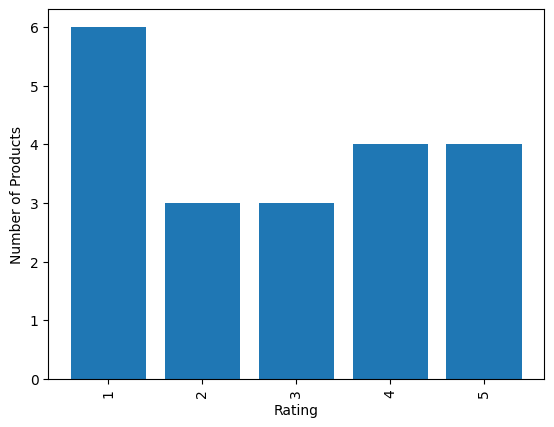

In [28]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [37]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""
    #df["price"].hist()
    plt.figure(figsize=(6, 4))
    plt.hist(df["price"], bins=5)
    plt.show()
    # YOUR CODE HERE
   #raise NotImplementedError()

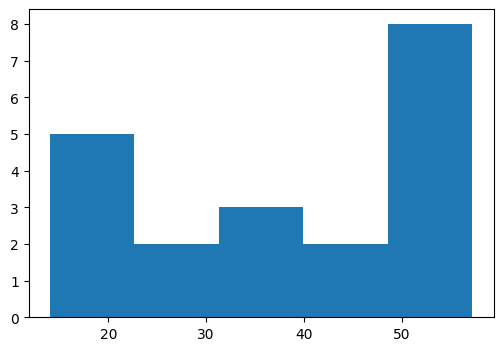

In [38]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [43]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
    title_lengths = df["title"].fillna("").apply(lambda x: len(x.replace(" ", "")))
    plt.figure(figsize=(6, 4))
    plt.hist(title_lengths, bins=5)
    plt.show()

    # YOUR CODE HERE
    #raise NotImplementedError()

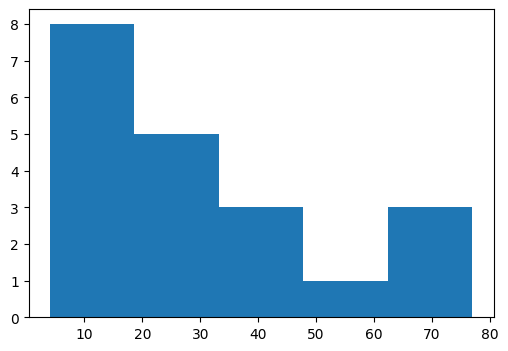

In [44]:
plot_title_length_distribution(df)

In [45]:
title = df["title"].iloc[0]         
print("Title:", title)
print("Length (including spaces):", len(title))
print("Length (no spaces):", len(title.replace(" ", "")))

Title: A Light in the Attic
Length (including spaces): 20
Length (no spaces): 16


In [46]:
df["title"].fillna("").apply(lambda x: len(x.replace(" ", ""))).iloc[0]


np.int64(16)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [54]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""
    sns.boxplot(df,x="rating", y="price")

    # YOUR CODE HERE
    #raise NotImplementedError()

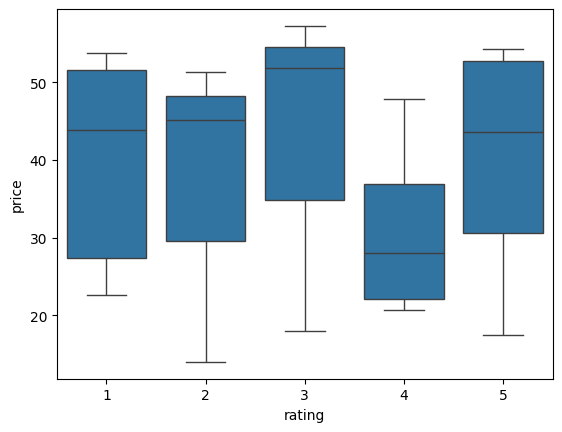

In [55]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [56]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""
    sns.heatmap(df.corr(numeric_only=True), annot=True)

    # YOUR CODE HERE
    #raise NotImplementedError()

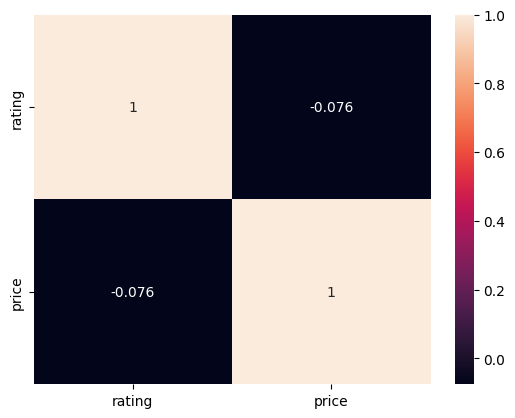

In [57]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [58]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """
    grouped = df.groupby("rating")["price"]
    stats = grouped.describe(percentiles=[0.25, 0.5, 0.75])[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]]
    return stats
    # YOUR CODE HERE
    #raise NotImplementedError()

In [59]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23
